<a href="https://colab.research.google.com/github/yashTilak1004/Pytorch-Practise/blob/main/Practise_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv("wine-reviews.csv",usecols=["country","description","points","price","variety","winery"])

df = df.dropna(subset = ["description","points"])#subset means in what column the nan is dropped

In [ ]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


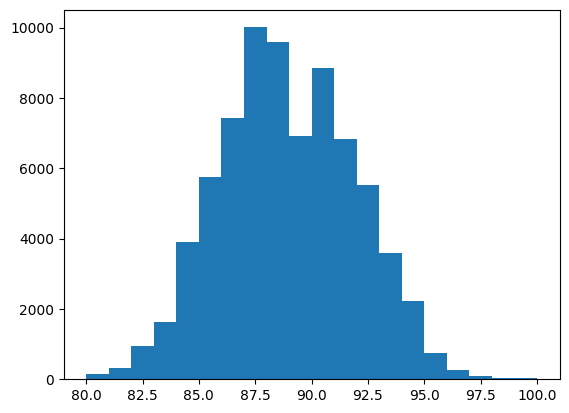

In [ ]:
plt.hist(df.points,bins=20)
plt.show()

In [ ]:
import torch

#default type of tensor is float 32
tensor = torch.randn(3,2)
tensor

#torch.randn
#torch.zeros

tensor([[-0.8422,  1.1039],
        [ 0.1897,  0.0374],
        [ 2.4390,  0.2037]])

In [ ]:
#torch.tensor(np array)
my_torch = torch.arange(10)
#arange->range


#use reshape and view to change dimenison of tensor
my_torch = my_torch.reshape(2,5)


my_torch


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#reshape for when we don't know the number of items,use -1
my_torch2 = torch.arange(10)
my_torch2 = my_torch2.reshape(2,-1)
my_torch2
#a row or column along with -1

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch3 = torch.arange(10)
my_torch3 = my_torch3.view(2,5)

my_torch3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
#reshape and view they update the torch
my_torch_r = torch.arange(10)
my_torch4 = my_torch_r.reshape(2,5)
my_torch_r[1] = 1111
my_torch4
#the update happened on the original tensor is observed in the reshaped tensor


tensor([[   0, 1111,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [ ]:
my_torch_r[7]
# a tensor datatype

tensor(7)

In [ ]:
my_torch8 = my_torch_r.reshape(5,2)
my_torch8[:,0]
#returns a row
my_torch8[:,1:]#columns

tensor([[1111],
        [   3],
        [   5],
        [   7],
        [   9]])

In [ ]:
#tensor math operations
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

print(tensor_a+tensor_b)
print(torch.add(tensor_a,tensor_b))#torch.add
#torch.sub(tensor_a,tensor_b)
#torch.multiply(tensor_a,tensor-b)  mul
#torch.div(tensor_a,tensor_b)
print(tensor_b%tensor_a)
#torch.remainder(tensor_a,tensor_b)

#powers
torch.pow(tensor_a,tensor_b)
tensor_a.add(tensor_b)


#called reassignment
tensor_a = tensor_a+tensor_b


tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])
tensor([0, 0, 1, 0])


tensor([ 6,  8, 10, 12])

In [ ]:
#basic neural network
import torch.nn as nn
import torch
import torch.nn.functional as F#helps to move the data forward


 #A model class that inherits the nn.Module

class Model(nn.Module):#the class inherits the nn.Module
  #Input layer has 4 features of the flower,2 hidden layers,1 output layer
  def __init__(self,in_features = 4,h1 = 8,h2 = 9,out = 3):#4 input features
    super().__init__()  #instantiates the nn.Module
    self.fc1 = nn.Linear(in_features,h1) #a layer
    #fully connected input and hidden layer1 layers
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out)

  def forward(self,x):#x is some data
    x = F.relu(self.fc1(x))#rectified linear unit,do something for an output  push data into first layer
    x = F.relu(self.fc2(x))#then second
    x = self.out(x)#get output

    return x




In [ ]:
#pick a manual seed for randomisation
torch.manual_seed(21)
#create an instance of the model
model = Model()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#train test and split set x,y
x = df.drop('species',axis=1)
y = df['species']

#convert x to numpy values
x = x.values
y = y.values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#convert them to float tensors,long tensors are 64 bit integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:

#error values
criterion = nn.CrossEntropyLoss()
#optimizer for ml to learn->learning rate lr(epochs)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
#model training
epochs = 100
lossess = []
for i in range(epochs):
  #get a predictions
  y_pred = model.forward(X_train)
  #measure loss
  loss = criterion(y_pred,y_train)#compare them

  lossess.append(loss.detach().numpy())

  #print every 10 epoch
  if(epochs%10 == 0):
    print(f'Epoch:{i} and loss:{loss}')

   #Backpropogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:1.1334308385849
Epoch:1 and loss:1.1026513576507568
Epoch:2 and loss:1.0809409618377686
Epoch:3 and loss:1.0632083415985107
Epoch:4 and loss:1.046170949935913
Epoch:5 and loss:1.0285183191299438
Epoch:6 and loss:1.0088447332382202
Epoch:7 and loss:0.9865134358406067
Epoch:8 and loss:0.96170973777771
Epoch:9 and loss:0.9352844953536987
Epoch:10 and loss:0.9074409604072571
Epoch:11 and loss:0.8779426217079163
Epoch:12 and loss:0.8468865752220154
Epoch:13 and loss:0.8143309354782104
Epoch:14 and loss:0.7803184986114502
Epoch:15 and loss:0.7450948357582092
Epoch:16 and loss:0.7091060876846313
Epoch:17 and loss:0.6732204556465149
Epoch:18 and loss:0.6381148099899292
Epoch:19 and loss:0.6042936444282532
Epoch:20 and loss:0.5723268985748291
Epoch:21 and loss:0.5427698493003845
Epoch:22 and loss:0.5157410502433777
Epoch:23 and loss:0.49079200625419617
Epoch:24 and loss:0.4688916504383087
Epoch:25 and loss:0.44886088371276855
Epoch:26 and loss:0.4301638603210449
Epoch:27 and lo

Text(0.5, 0, 'Epoch')

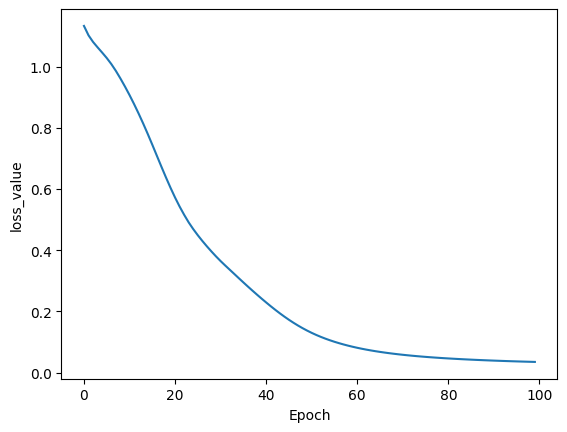

In [ ]:
plt.plot(range(epochs),lossess)
plt.ylabel("loss_value")
plt.xlabel("Epoch")